<a href="https://colab.research.google.com/github/OliwiaP/Python_for_Data_Analysis/blob/master/hysteresis_loop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving loop_H_M_H_M.txt to loop_H_M_H_M.txt


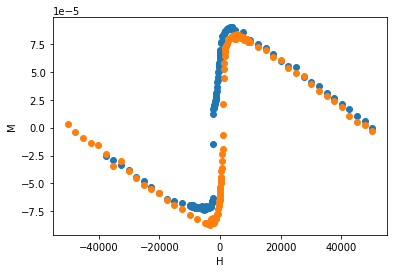

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import csv

x = []                       # H for upper branch
y = []                       # M for upper branch
a = []                       # H for lower branch
b = []                       # M for lower branch

with open('loop_H_M_H_M.txt','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        x.append(float(row[0]))
        y.append(float(row[1]))
        a.append(float(row[2]))
        b.append(float(row[3]))

plt.scatter(x, y)
plt.scatter(a, b)   
plt.xlabel('Magnetic field H [Oe]')
plt.ylabel('Magnetization M [emu]')

plt.show()

fit background:

In [6]:
line_x = x[0:10]
line_y = y[0:10]

#plt.scatter(line_x, line_y)
#plt.show()

model = np.polyfit(line_x, line_y, 1)
print('fitted parameters:', model)

fitted parameters: [-2.04553771e-09  1.03088391e-04]


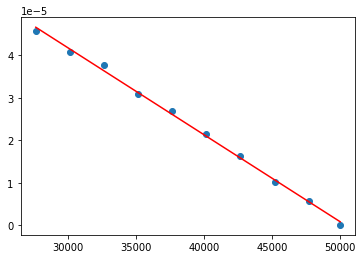

In [7]:
predict = np.poly1d(model)

x_lin_reg = line_x
y_lin_reg = predict(x_lin_reg)

plt.scatter(line_x, line_y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
plt.show()

cut background:

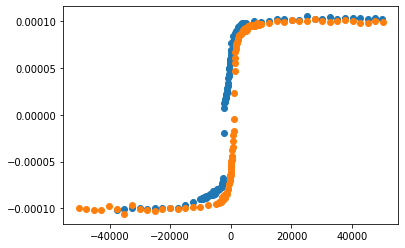

In [8]:
y1 = []
b1 = []

for i in range(len(x)):
  y1.append(y[i] - x[i]*model[0])

for i in range(len(a)):
  b1.append(b[i] - a[i]*model[0])

plt.scatter(x, y1)
plt.scatter(a, b1)
#plt.xlim(-5000, 5000)     

plt.show()

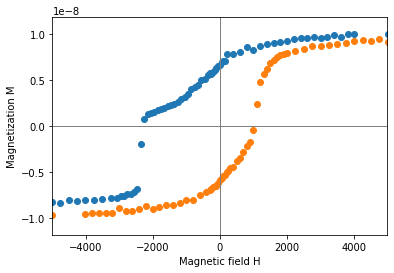

In [9]:
from statistics import mean

average = mean(y1[0:21])            # average value of saturation magnetization

y_normal = []
b_normal = []

for i in y1:
  y_normal.append(i * average)      # normalize the values for the upper branch

for i in b1:
  b_normal.append(i * average)      # normalize the values for the lower branch

plt.scatter(x, y_normal)
plt.scatter(a, b_normal)
plt.xlim(-5000, 5000)    
plt.xlabel('Magnetic field H')
plt.ylabel('Magnetization M')
plt.axhline(linewidth=1, color='grey') 
plt.axvline(linewidth=1, color='grey') 

plt.show()

Fit upper branch:

f1(x) = 2/pi * M1 * arctg(g1*(x-H1))
f2(x) = 2/pi * M2 * arctg(g2*(x-H2))

upper brach = f1(x) + f2(x)     via M1, g1, H1, M2, g2, H2

conditions: M1 + M2 = 1

Lower branch in the same way